In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
if __name__ == '__main__':
 Ausmen_df = pd.read_csv('/content/AusOpen-men-2013.csv',header=None)
if __name__ == '__main__':
  Auswomen_df = pd.read_csv('/content/AusOpen-women-2013.csv',header=None)
if __name__ == '__main__':
  Fremen_df = pd.read_csv('/content/FrenchOpen-men-2013.csv',header=None)
if __name__ == '__main__':
  Frewomen_df = pd.read_csv('/content/FrenchOpen-women-2013.csv',header=None)
if __name__ == '__main__':
   USmen_df = pd.read_csv('/content/USOpen-men-2013.csv',header=None)
if __name__ == '__main__':
  USwomen_df = pd.read_csv('/content/USOpen-women-2013.csv',header=None)
if __name__ == '__main__':
  Wimmen_df = pd.read_csv('/content/Wimbledon-men-2013.csv',header=None)
if __name__ == '__main__':
  Wimwomen_df = pd.read_csv('/content/Wimbledon-women-2013.csv',header=None)

Question 1

In [17]:
for i in [6,8,24,26]:
  Ausmen_df[i] = pd.to_numeric(Ausmen_df[i],errors='coerce')
Ausmen_df.dropna(subset=[6,8,24,26],inplace=True)

st_df1 = pd.DataFrame({'Player': Ausmen_df[0],
                        'FSP' : Ausmen_df[6],
                        'SSP' : Ausmen_df[8],
                          })

st_df2 = pd.DataFrame({'Player': Ausmen_df[1],
                        'FSP' : Ausmen_df[24],
                        'SSP' : Ausmen_df[26],
                          })
st_df = pd.concat([st_df1,st_df2])
fsp = st_df.sort_values('FSP')
ssp = st_df.sort_values('SSP')

print(fsp.tail(10))
print('-----')
print(ssp.tail(10))
print('-----')

top8 = Ausmen_df[118:122]
top8_df = pd.DataFrame({'Player 1': top8[0],
                        'Player 2': top8[1]})
print(top8_df)                                         

                    Player  FSP  SSP
81           Roger Federer   76   24
3            Denis Istomin   77   23
69       Nikolay Davydenko   77   23
10       Nikolay Davydenko   77   23
41              John Isner   78   22
126           Rafael Nadal   78   22
75           Pablo Andujar   79   21
50   Roberto Bautista Agut   82   18
108  Roberto Bautista Agut   83   17
29              Ivan Dodig   83   17
-----
                 Player  FSP  SSP
19    Ricardas Berankis   50   50
83          Marin Cilic   50   50
83         Gilles Simon   49   51
62         Tobias Kamke   49   51
24   Jan-Lennard Struff   49   51
8         Fabio Fognini   47   53
44      Stephane Robert   46   54
67       Ernests Gulbis   46   54
84      Thomaz Bellucci   45   55
103       Damir Dzumhur   44   56
-----
               Player 1         Player 2
120  Stanislas Wawrinka   Novak Djokovic
121       Tomas Berdych     David Ferrer
122         Andy Murray    Roger Federer
123        Rafael Nadal  Grigor Dimitrov


Question 2

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


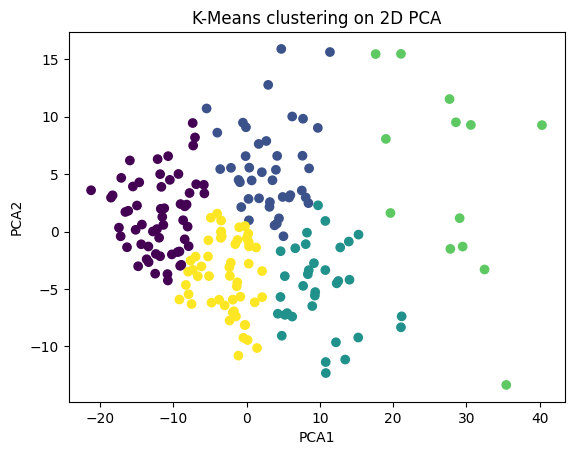

In [ ]:
for i in [10,12,15,17,18,28,30,33,35,36]:
  Auswomen_df[i] = pd.to_numeric(Auswomen_df[i],errors='coerce')
Auswomen_df.dropna(subset=[10,12,15,17,18,28,30,33,35,36],inplace=True)

pts_df1 = pd.DataFrame({  'Player': Auswomen_df[0],
                           'Aces': Auswomen_df[10],
                        'Winners': Auswomen_df[12],
                     'Net Points': Auswomen_df[15],
                   'Break Points': Auswomen_df[17],
                            'TPW': Auswomen_df[18]})

pts_df2 = pd.DataFrame({  'Player': Auswomen_df[1],
                           'Aces': Auswomen_df[28],
                        'Winners': Auswomen_df[30],
                     'Net Points': Auswomen_df[33],
                   'Break Points': Auswomen_df[35],
                            'TPW': Auswomen_df[36]})

pts_df = pd.concat([pts_df1,pts_df2],axis=0)

pts_df.loc[(pts_df['TPW'] < 40) & (pts_df['TPW'] >= 20), 'TPW'] = 1
pts_df.loc[(pts_df['TPW'] < 60) & (pts_df['TPW'] >= 40), 'TPW'] = 2
pts_df.loc[(pts_df['TPW'] < 80) & (pts_df['TPW'] >= 60), 'TPW'] = 3
pts_df.loc[(pts_df['TPW'] < 100) & (pts_df['TPW'] >= 80), 'TPW'] = 4
pts_df.loc[(pts_df['TPW'] < 120) & (pts_df['TPW'] >= 100), 'TPW'] = 5

X = pts_df[['Aces','Winners','Net Points','Break Points']].to_numpy()
y = pts_df[['TPW']].to_numpy()

from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
model = pca.fit(X)
X_2D = model.transform(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_2D)
y_kmeans = kmeans.predict(X_2D)

ax = plt.axes()
ax.scatter(X_2D[:,0],X_2D[:,1],c=y_kmeans)
ax.set_title("K-Means clustering on 2D PCA")
ax.set(xlabel='PCA1',ylabel='PCA2')
plt.show()

Question 3

In [ ]:
Fremen_df = Fremen_df[:65]
for i in [7,9,11,25,27,29]:
  Fremen_df[i] = pd.to_numeric(Fremen_df[i],errors='coerce')
Fremen_df.dropna(subset=[7,9,11,25,27,29],inplace=True)

avg_fsw = (Fremen_df[7].mean() + Fremen_df[25].mean())/2 
avg_ssw = (Fremen_df[9].mean() + Fremen_df[27].mean())/2
avg_dbf = (Fremen_df[11].mean() + Fremen_df[29].mean())/2

req_fsw1 = Fremen_df[Fremen_df[7] > avg_fsw] 
req_fsw2 = Fremen_df[Fremen_df[25] > avg_fsw] 
req_ssw1 = Fremen_df[Fremen_df[9] > avg_ssw]
req_ssw2 = Fremen_df[Fremen_df[27] > avg_ssw]
dbf_fsw = len(req_fsw1[req_fsw1[11] > avg_dbf]) + len(req_fsw2[req_fsw2[11] > avg_dbf])
dbf_ssw = len(req_ssw1[req_ssw1[11] > avg_dbf]) + len(req_ssw2[req_ssw2[11] > avg_dbf])

prob1 = dbf_fsw/(len(req_fsw1) + len(req_fsw1))
prob2 = dbf_ssw/(len(req_ssw1) + len(req_ssw2))

#probability that a player makes more double faults than average given that they have fsw less than average >/< they have ssw less than average
print(prob1)
print(prob2)

0.5483870967741935
0.5


<ipython-input-7-fccfdba86153>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fremen_df[i] = pd.to_numeric(Fremen_df[i],errors='coerce')
<ipython-input-7-fccfdba86153>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fremen_df.dropna(subset=[7,9,11,25,27,29],inplace=True)


Question 4

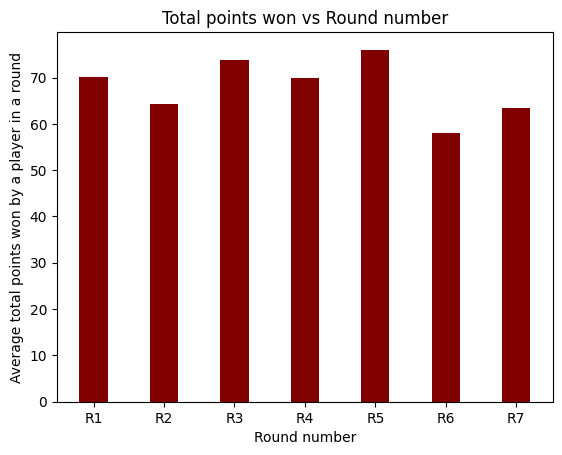

In [ ]:
for i in [18,36]:
  Frewomen_df[i] = pd.to_numeric(Frewomen_df[i],errors='coerce')

R1 = Frewomen_df[:65]
R2 = Frewomen_df[65:97]
R3 = Frewomen_df[97:113]
R4 = Frewomen_df[113:121]
R5 = Frewomen_df[121:125]
R6 = Frewomen_df[125:127]
R7 = Frewomen_df[127:]

avg_tpw = []
for i in [R1,R2,R3,R4,R5,R6,R7]:
  avg_tpw.append((i[18].mean() + i[36].mean())/2)

plt.bar(['R1','R2','R3','R4','R5','R6','R7'], avg_tpw, color ='maroon',width = 0.4)
plt.xlabel("Round number")
plt.ylabel("Average total points won by a player in a round")
plt.title("Total points won vs Round number")
plt.show()

Question 5

<ipython-input-20-da27dc526468>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]


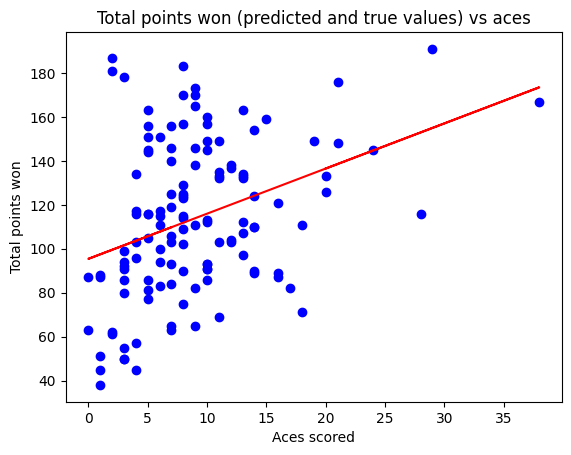

In [20]:
for i in [10,18,28,36]:
  USmen_df[i] = pd.to_numeric(USmen_df[i],errors='coerce')
USmen_df.dropna(subset=[10,18,28,36],inplace=True)

df_1 = pd.DataFrame({   'player': USmen_df[0],
                          'Aces': USmen_df[10],
                  'Total points': USmen_df[18]})
df_2 = pd.DataFrame({   'player': USmen_df[1],
                          'Aces': USmen_df[28],
                  'Total points': USmen_df[36]})
df = pd.concat([df_1,df_2])
from sklearn.linear_model import LinearRegression
x = df['Aces']
X = x[:, np.newaxis]
y = df['Total points']
model = LinearRegression()
model.fit(X,y)
tpw = model.predict(X)

plt.plot(X,tpw,c ='r')
plt.scatter(X,y,c ='b')
plt.xlabel("Aces scored")
plt.ylabel("Total points won")
plt.title("Total points won (predicted and true values) vs aces")
plt.show()

Question 6

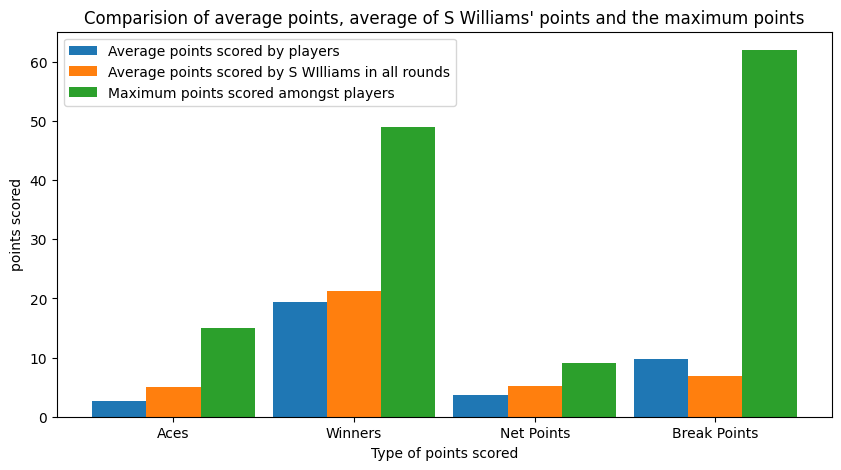

In [ ]:
for i in [10,12,15,17,28,30,33,35]:
  USwomen_df[i] = pd.to_numeric(USwomen_df[i],errors='coerce')
Fremen_df.dropna(subset=[10,12,15,17],inplace=True)

SWilliams_df = USwomen_df[USwomen_df[0] == 'S Williams']

avg = [(USwomen_df[10].mean() + USwomen_df[28].mean())/2, (USwomen_df[12].mean() + USwomen_df[30].mean())/2,
       (USwomen_df[15].mean() + USwomen_df[33].mean())/2, (USwomen_df[17].mean() + USwomen_df[35].mean())/2]
SWill_avg = [SWilliams_df[10].mean(), SWilliams_df[12].mean(), SWilliams_df[15].mean(), SWilliams_df[17].mean()]
top = [max(USwomen_df[10].max(),USwomen_df[28].max()), max(USwomen_df[12].max(),USwomen_df[30].max()),
       max(USwomen_df[15].max(),USwomen_df[33].max()), max(USwomen_df[17].max(),USwomen_df[35].max())]

X = np.arange(len(SWill_avg))
plt.figure(figsize = (10,5))
plt.bar(X  - 0.3, avg, 0.3, label = 'Average points scored by players')
plt.bar(X , SWill_avg, 0.3, label = 'Average points scored by S WIlliams in all rounds')
plt.bar(X  + 0.3, top, 0.3, label = 'Maximum points scored amongst players')

plt.xticks(X,['Aces','Winners','Net Points','Break Points'])
plt.xlabel("Type of points scored")
plt.ylabel("points scored")
plt.title("Comparision of average points, average of S Williams' points and the maximum points")
plt.legend()
plt.show()

Question 7

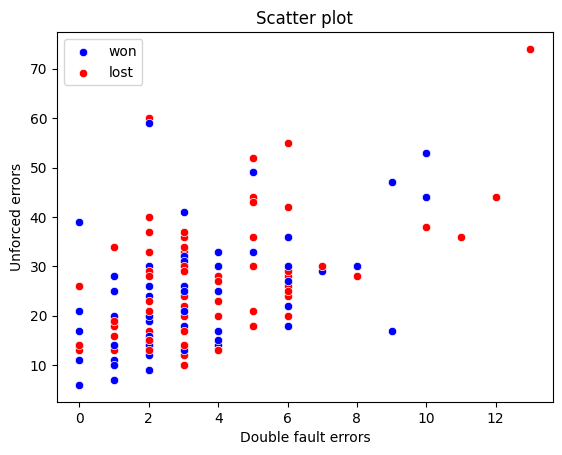

In [6]:
Wimmen_df = Wimmen_df[:63]
for i in [3,11,13,29,31]:
  Wimmen_df[i] = pd.to_numeric(Wimmen_df[i],errors='coerce')

Wimmen_df.dropna(subset=[11,13,29,31],inplace=True)
res_1 = Wimmen_df[Wimmen_df[3] == 1]
res_0 = Wimmen_df[Wimmen_df[3] == 0]

sns.scatterplot(data=res_1, x=11, y=13, c="b", label= 'won')
sns.scatterplot(data=res_0, x=11, y=13, c="r", label= 'lost')
sns.scatterplot(data=res_0, x=29, y=31, c="b")
sns.scatterplot(data=res_1, x=29, y=31, c="r")
plt.xlabel('Double fault errors')
plt.ylabel('Unforced errors')
plt.title('Scatter plot')
plt.show()

Question 8

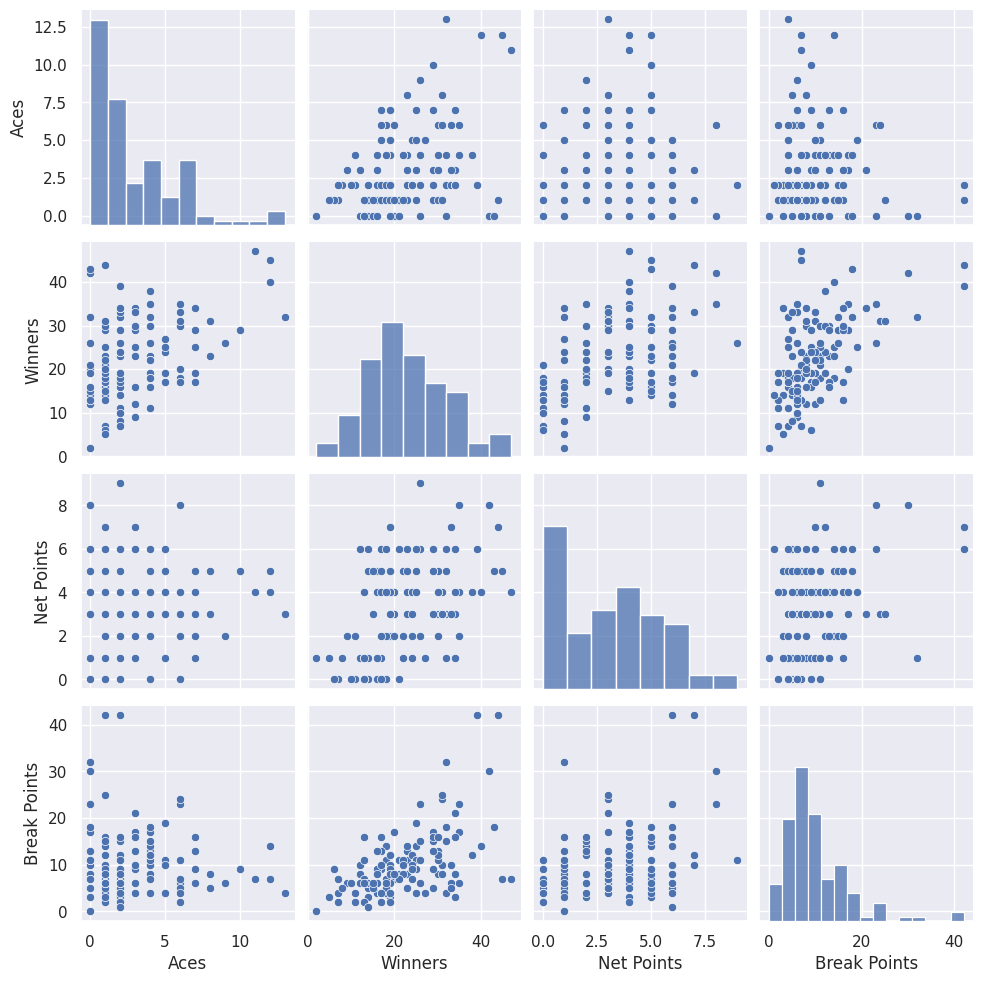

In [ ]:
Wimwomen_df = Wimwomen_df[:65]
for i in [10,12,15,17,28,30,33,35]:
  Wimwomen_df[i] = pd.to_numeric(Wimwomen_df[i],errors='coerce')
Wimwomen_df.dropna(subset=[10,12,15,17,28,30,33,35],inplace=True)

pts_df1 = pd.DataFrame({   'Aces': Wimwomen_df[10],
                        'Winners': Wimwomen_df[12],
                     'Net Points': Wimwomen_df[15],
                   'Break Points': Wimwomen_df[17]})

pts_df2 = pd.DataFrame({   'Aces': Wimwomen_df[28],
                        'Winners': Wimwomen_df[30],
                     'Net Points': Wimwomen_df[33],
                   'Break Points': Wimwomen_df[35]})
pts_df = pd.concat([pts_df1,pts_df2],axis=0)
pts_df.rename(columns = {0:'Aces',1:'Winners',2:'Break points',3:'Net points'},inplace=True)
sns.set(rc={'figure.figsize':(10,10)})
sns.pairplot(pts_df)